## Intro MSc students LOFAR group 2025-2026
#### Week 1:
1. Join Slack
2. Download LOFAR and NVSS radio catalogues
3. Crossmatch VLASS and a LOFAR catalog and determine spectral indices (Extra: add NVSS as well to obtain a third flux measurement for your spectral index estimate)
4. Make a histogram of the spectral indices you found (you can use Python for this)
5. Take catalog and image of LOFAR deep field and plot interesting sources (e.g. Brightest, steepest spectral index, largest, or other properties you can think of)

##### Week 1, task 2
Download LOFAR, VLASS and NVSS radio catalogues here:
- LOFAR LoTSS DR2: https://lofar-surveys.org/dr2_release.html
- VLASS: https://cirada.ca/vlasscatalogueql0
- NVSS: https://www.cv.nrao.edu/nvss/anonftp.shtml -> obtain through ftp connection

##### Week 1, task 3
Crossmatch VLASS and a LOFAR catalog and determine spectral indices (Extra: add NVSS as well to obtain a third flux measurement for your spectral index estimate)

In [1]:
# Import all necessary libraries
from astropy.table import Table
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

In [2]:
lotss_dr2_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS-DR2/Radio_catalogue_sources_maskinfo_v1.1.fits"
lotss_dr2 = Table.read(lotss_dr2_path)
print(lotss_dr2.columns)

vlass_path = "/data2/visserscott/Documents/Observational_Data/VLASS/CIRADA_VLASS1QLv3.1_table1_components.csv"
vlass = Table.read(vlass_path)
print(vlass.columns)

nvss_path = "/data2/visserscott/Documents/Observational_Data/NVSS/CATALOG.FIT"
nvss = Table.read(nvss_path)
print(nvss.columns)

<TableColumns names=('Source_Name','RA','E_RA','DEC','E_DEC','Peak_flux','E_Peak_flux','Total_flux','E_Total_flux','Maj','E_Maj','Min','E_Min','DC_Maj','E_DC_Maj','DC_Min','E_DC_Min','PA','E_PA','DC_PA','E_DC_PA','Isl_rms','S_Code','Mosaic_ID','Number_Pointings','Masked_Fraction')>
<TableColumns names=('Component_name','Component_id','Isl_id','RA','DEC','E_RA','E_DEC','Total_flux','E_Total_flux','Peak_flux','E_Peak_flux','Maj','E_Maj','Min','E_Min','PA','E_PA','Isl_Total_flux','E_Isl_Total_flux','Isl_rms','Isl_mean','Resid_Isl_rms','Resid_Isl_mean','RA_max','DEC_max','E_RA_max','E_DEC_max','S_Code','Xposn','E_Xposn','Yposn','E_Yposn','Xposn_max','E_Xposn_max','Yposn_max','E_Yposn_max','Maj_img_plane','E_Maj_img_plane','Min_img_plane','E_Min_img_plane','PA_img_plane','E_PA_img_plane','DC_Maj','E_DC_Maj','DC_Min','E_DC_Min','DC_PA','E_DC_PA','DC_Maj_img_plane','E_DC_Maj_img_plane','DC_Min_img_plane','E_DC_Min_img_plane','DC_PA_img_plane','E_DC_PA_img_plane','Tile','Subtile','QL_image_RA'

In [3]:
print(f"Number of LOFAR sources: {len(lotss_dr2)}")
print(f"Number of VLASS sources: {len(vlass)}")
print(f"Number of NVSS sources: {len(nvss)}")

Number of LOFAR sources: 4396228
Number of VLASS sources: 3347423
Number of NVSS sources: 1810672


In [4]:
vlass = vlass[vlass['Total_flux'] > 0.]
print(f"Number of VLASS sources with positive flux: {len(vlass)}")

lotss_dr2 = lotss_dr2[lotss_dr2['Total_flux'] > 0.]
print(f"Number of LOFAR sources with positive flux: {len(lotss_dr2)}")

Number of VLASS sources with positive flux: 2418340
Number of LOFAR sources with positive flux: 4396228


In [7]:
lofar_coords = SkyCoord(ra=lotss_dr2["RA"], dec=lotss_dr2["DEC"], unit=(u.deg, u.deg), frame='icrs')
vlass_coords = SkyCoord(ra=vlass['RA'], dec=vlass['DEC'], unit=(u.deg, u.deg), frame='icrs')

idx_match_lofar_vlass, separations_lofar_vlass, _ = match_coordinates_sky(lofar_coords, vlass_coords)
mask_distance_lofar_vlass = (separations_lofar_vlass < 3.0 * u.arcsec)
print(f"Number of LOFAR sources matched to VLASS within 3 arcsec: {np.sum(mask_distance_lofar_vlass)}")

Number of LOFAR sources matched to VLASS within 3 arcsec: 250347


##### Week 1, task 4
Make a histogram of the spectral indices. We know that LOFAR collects data at a frequency of $144$ MHz and for VLASS this is $2-4$ GHz (let's assume $3$ GHz)

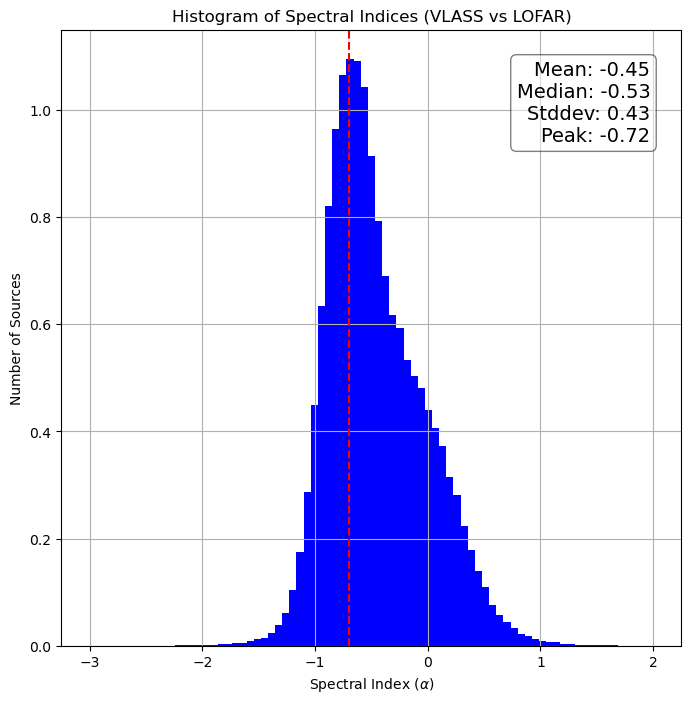

In [11]:
# Gather all information about fluxes and frequencies
lotss_freq = 144e6  # LOFAR frequency in Hz
vlass_freq = 3e9    # VLASS frequency in Hz
lofar_fluxes = lotss_dr2['Peak_flux'].data[mask_distance_lofar_vlass]  # Convert mJy to Jy
vlass_fluxes = vlass['Peak_flux'].data[idx_match_lofar_vlass][mask_distance_lofar_vlass]

# Calculate spectral indices
spectral_indices = np.log10(vlass_fluxes / lofar_fluxes) / np.log10(vlass_freq / lotss_freq)

# Plot histogram of spectral indices
plt.figure(figsize=(8, 8))
plt.hist(spectral_indices, bins=np.linspace(-3,2,80), color='blue', density=True)
plt.axvline(-0.7, color='red', linestyle='dashed', linewidth=1.5, label='Typical Spectral Index (-0.7)')
plt.xlabel(r'Spectral Index ($\alpha$)')
plt.ylabel('Number of Sources')
plt.title('Histogram of Spectral Indices (VLASS vs LOFAR)')

# print some text in the top right corner with the mean and stddev of the spectral indices
mean_alpha = np.mean(spectral_indices)
median_alpha = np.median(spectral_indices)
std_alpha = np.std(spectral_indices)
peak_alpha = np.histogram(spectral_indices, bins=np.linspace(-3,2,80))[1][np.argmax(np.histogram(spectral_indices, bins=np.linspace(-3,2,80))[0])]
textstr = f'Mean: {mean_alpha:.2f}\nMedian: {median_alpha:.2f}\nStddev: {std_alpha:.2f}\nPeak: {peak_alpha:.2f}'
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#plt.yscale('log')
plt.grid()
plt.show()

##### Week 1, task 5
We plot the brightest sources in the centre of the ELAIS-N1 field

In [12]:
elais_n1_sources_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_ELAIS-N1/LoTSS_ELAIS-N1_DR1/en1_final_component_catalogue-v1.0.fits"
elais_n1_sources = Table.read(elais_n1_sources_path)
print(elais_n1_sources.columns)

elais_n1_image_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_ELAIS-N1/LoTSS_ELAIS-N1_DR1/en1_radio_image.fits"
elais_n1_image_hdu = fits.open(elais_n1_image_path)
elais_n1_image_data = elais_n1_image_hdu[0].data.squeeze().squeeze()
elais_n1_image_header = elais_n1_image_hdu[0].header
elais_n1_image_wcs = wcs.WCS(elais_n1_image_header).celestial
print(elais_n1_image_header)
print(np.shape(elais_n1_image_data))
print(elais_n1_image_wcs)

<TableColumns names=('Component_Name','RA','DEC','E_RA','E_DEC','Total_flux','E_Total_flux','Peak_flux','E_Peak_flux','S_Code','Maj','Min','PA','E_Maj','E_Min','E_PA','DC_Maj','DC_Min','DC_PA','Created','Deblended_from','Parent_Source')>
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    4 / number of array dimensions                     NAXIS1  =                14000                                                  NAXIS2  =                14000                                                  NAXIS3  =                    1                                                  NAXIS4  =                    1                                                  WCSAXES =                    4 / Number of coordinate axes                      CRPIX1  =               7001.0 / Pixel coordinate of reference point            CRPIX2  =               7001.0 / Pixel coo

Number of sources in central ELAIS-N1 region: 4751
Number of sources with a flux greater than 0.1 Jy: 5


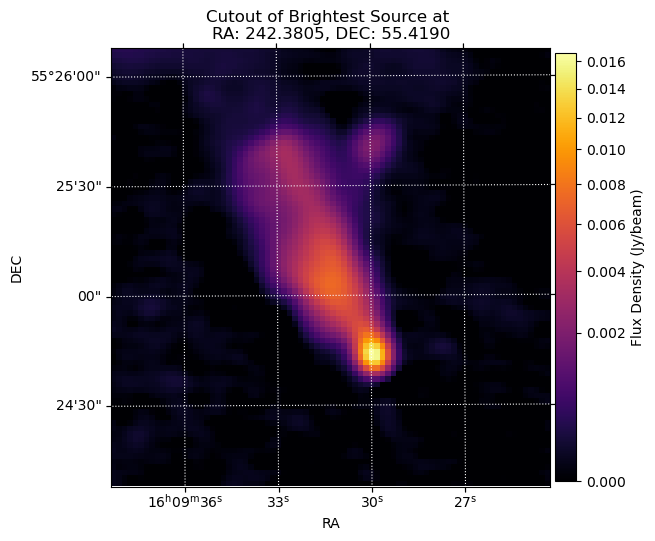

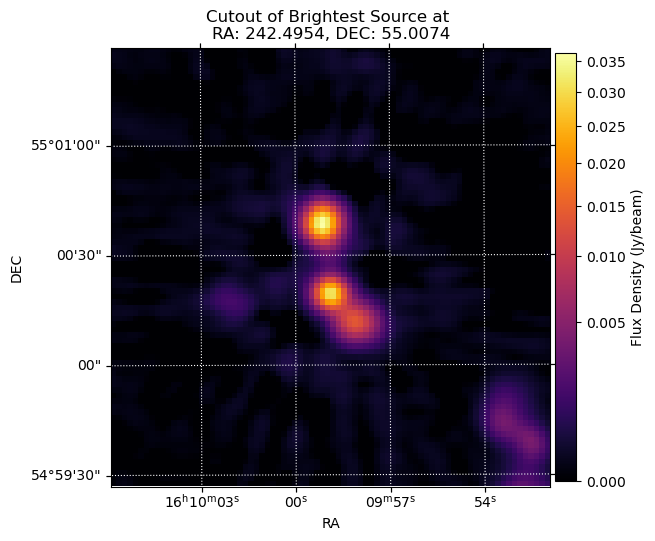

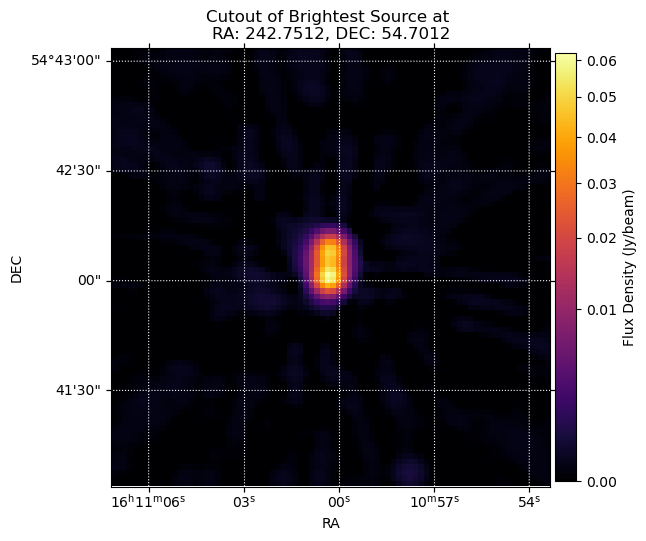

In [13]:
from astropy.visualization import astropy_mpl_style, ImageNormalize, ZScaleInterval, PercentileInterval, AsinhStretch, SqrtStretch, SquaredStretch
from astropy.nddata import Cutout2D
from astropy.stats import sigma_clip

# Select the brightest sources
mask_central_sources = (elais_n1_sources['RA'] > 242.0) & (elais_n1_sources['RA'] < 243.5) & (elais_n1_sources['DEC'] > 54.5) & (elais_n1_sources['DEC'] < 55.5)
print(f"Number of sources in central ELAIS-N1 region: {sum(mask_central_sources)}")
brightest_sources = elais_n1_sources[(elais_n1_sources['Total_flux'] > 0.1) & (mask_central_sources)]  # Flux threshold in Jy
print(f"Number of sources with a flux greater than 0.1 Jy: {len(brightest_sources)}")

# Make a cutout of one of the brightest sources in the ELAIS-N1 field
coords_brightest = SkyCoord(ra=brightest_sources['RA']*u.degree, dec=brightest_sources['DEC']*u.degree)
cutout_size = 2.0*u.arcmin

n=0
for i in range(len(coords_brightest)):
    if n == 3:
        break
    try:
        cutout = Cutout2D(elais_n1_image_data, position=coords_brightest[i], size=(cutout_size, cutout_size), wcs=elais_n1_image_wcs)
        n += 1
    except Exception as e:
        #print(f"Could not create cutout for source at RA: {coords_brightest[i].ra.degree}, DEC: {coords_brightest[i].dec.degree}. Error: {e}")
        continue
     
    # Determine local rms noise to define normalization
    filtered_image = sigma_clip(cutout.data, sigma=3, maxiters=7)
    rms_noise = np.sqrt(np.mean(filtered_image**2))
    norm = ImageNormalize(vmin=0., vmax=np.max(cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
     
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'projection': cutout.wcs})
    plt.imshow(cutout.data, origin='lower', cmap='inferno', norm=norm)
    plt.colorbar(label='Flux Density (Jy/beam)', pad=0.01, fraction=0.046)
    plt.title(f'Cutout of Brightest Source at \nRA: {coords_brightest[i].ra.degree:.4f}, DEC: {coords_brightest[i].dec.degree:.4f}')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.grid(color='white', ls='dotted')
    plt.show()

## Week 2:
1. Fit some interesting radio sources to obtain fluxes and shapes
2. Download normal and high-resolution LOFAR facet from internal EDFN page
3. Combine plots of multiple LOFAR resolutions for radio source ID 14673 (see previous slide)
4. Pay attention to the scaling of the radio image (Hint: Determine the RMS of the radio image)

### Week 2, task 1
Fit some interesting radio sources to obtain fluxes and shapes. We take some of the larger sources in the centre of the ELAIS-N1 field

Number of sources in central ELAIS-N1 region: 4751
Number of sources with a major axis greater than 20 arcsec: 49

Fitted position: RA = 242.040452, DEC = 54.782876
Original position: RA = 242.040530, DEC = 54.782860
Fitted amplitude: 0.001488 Jy/beam
Catalogue peak flux: 0.002245 Jy/beam
Fitted x_stddev: 4.429700 pixels = 6.644550 arcsec, Fitted y_stddev: 17.576266 pixels = 26.364399 arcsec
Catalogue major axis: 48.777696 arcsec, minor axis: 14.972813 arcsec
Fitted position angle: -12.87 degrees, Catalogue position angle: 163.30 degrees


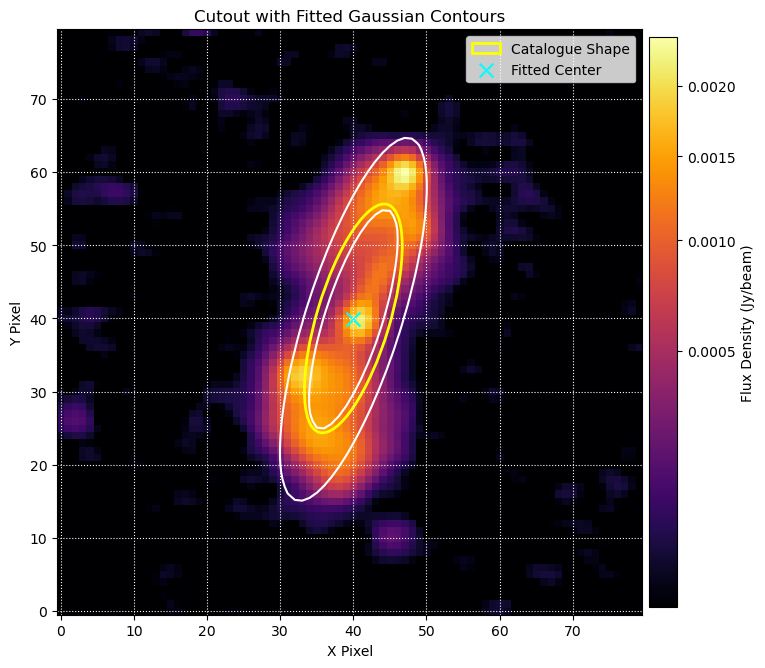

Fitted position: RA = 242.053567, DEC = 54.667724
Original position: RA = 242.052326, DEC = 54.667699
Fitted amplitude: 0.000106 Jy/beam
Catalogue peak flux: 0.000108 Jy/beam
Fitted x_stddev: 2.206838 pixels = 3.310257 arcsec, Fitted y_stddev: 1.568609 pixels = 2.352914 arcsec
Catalogue major axis: 22.537723 arcsec, minor axis: 15.055798 arcsec
Fitted position angle: -49.81 degrees, Catalogue position angle: 110.95 degrees


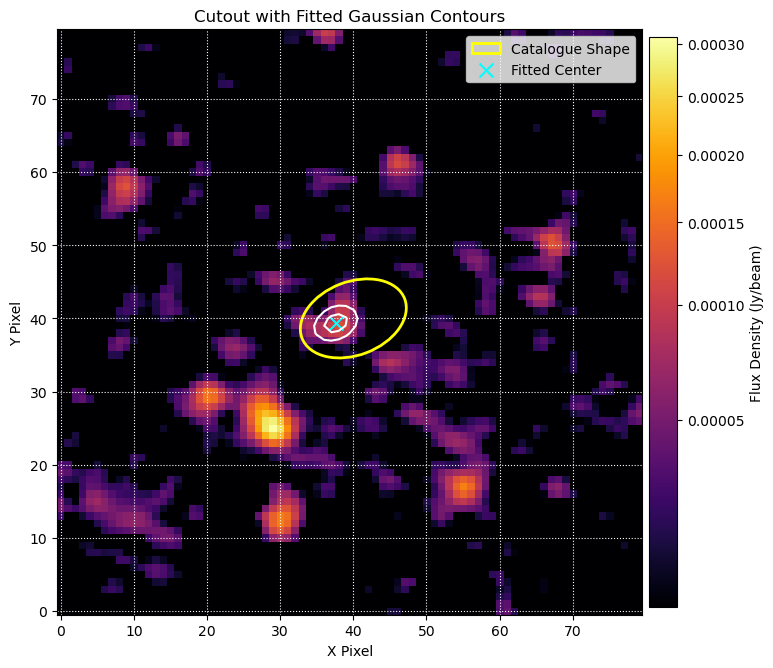

Fitted position: RA = 242.061405, DEC = 55.450944
Original position: RA = 242.062044, DEC = 55.450617
Fitted amplitude: 0.003680 Jy/beam
Catalogue peak flux: 0.004552 Jy/beam
Fitted x_stddev: 1.832780 pixels = 2.749171 arcsec, Fitted y_stddev: 5.503406 pixels = 8.255108 arcsec
Catalogue major axis: 26.119197 arcsec, minor axis: 10.841440 arcsec
Fitted position angle: 25.55 degrees, Catalogue position angle: 34.09 degrees


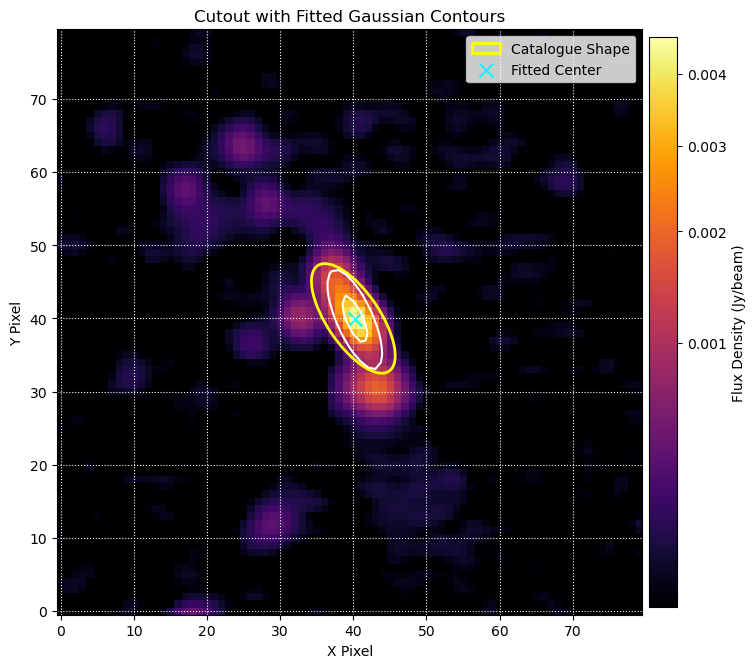

Fitted position: RA = 242.066616, DEC = 55.455612
Original position: RA = 242.070638, DEC = 55.457384
Fitted amplitude: 0.001092 Jy/beam
Catalogue peak flux: 0.000057 Jy/beam
Fitted x_stddev: 19.578540 pixels = 29.367809 arcsec, Fitted y_stddev: 2.115128 pixels = 3.172691 arcsec
Catalogue major axis: 46.612602 arcsec, minor axis: 25.800056 arcsec
Fitted position angle: -35.58 degrees, Catalogue position angle: 100.89 degrees


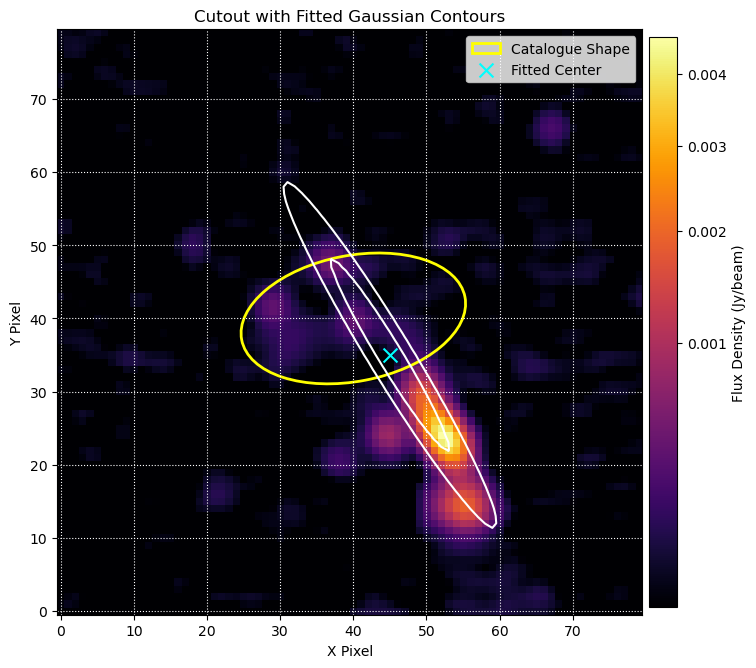

Fitted position: RA = 242.073444, DEC = 55.329692
Original position: RA = 242.073929, DEC = 55.328943
Fitted amplitude: 0.002220 Jy/beam
Catalogue peak flux: 0.000072 Jy/beam
Fitted x_stddev: 1.752781 pixels = 2.629171 arcsec, Fitted y_stddev: 1.951022 pixels = 2.926532 arcsec
Catalogue major axis: 21.319217 arcsec, minor axis: 13.357110 arcsec
Fitted position angle: -15.40 degrees, Catalogue position angle: 5.44 degrees


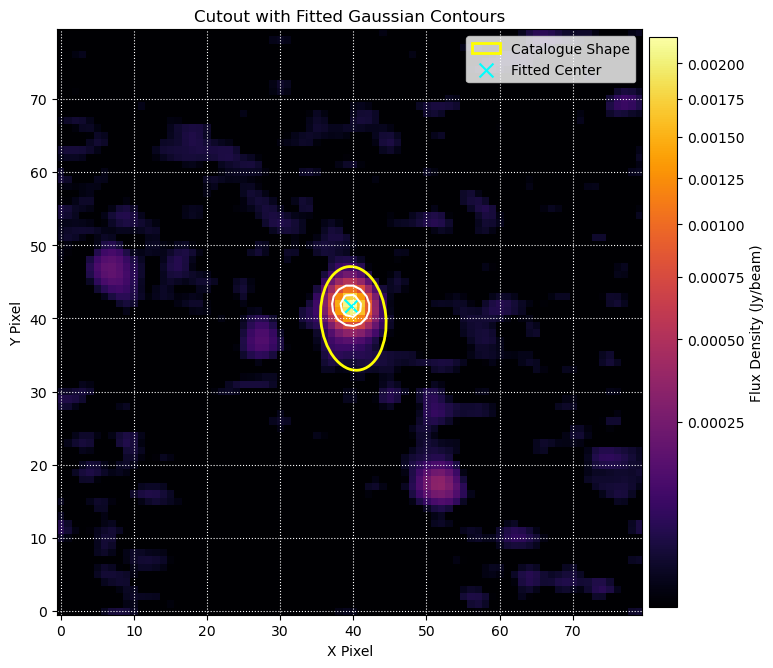

In [14]:
from astropy.modeling import models, fitting
from matplotlib.patches import Ellipse

# Select one large source in the centre of the field
mask_central_sources = (elais_n1_sources['RA'] > 242.0) & (elais_n1_sources['RA'] < 243.5) & (elais_n1_sources['DEC'] > 54.5) & (elais_n1_sources['DEC'] < 55.5)
print(f"Number of sources in central ELAIS-N1 region: {sum(mask_central_sources)}")
mask_largest_sources = elais_n1_sources['Maj']*3600 > 20.0  # Major axis greater than 20 arcsec
largest_sources = elais_n1_sources[mask_largest_sources & mask_central_sources]
print(f"Number of sources with a major axis greater than 20 arcsec: {len(largest_sources)}\n")

# Write a function to create cutouts
def create_cutout(ra, dec, size, image, wcs):
    position = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)
    cutout = Cutout2D(image, position=position, size=(size, size), wcs=wcs)
    return cutout

for i in np.arange(5):
    co = create_cutout(largest_sources['RA'][i], largest_sources['DEC'][i], size=cutout_size, image=elais_n1_image_data, wcs=elais_n1_image_wcs)
    rms_noise = np.sqrt(np.mean(sigma_clip(co.data, sigma=3, maxiters=7)**2))

    fit_p = fitting.TRFLSQFitter(calc_uncertainties=True)
    # Determine x and y values in arcsec
    x_mean_est = co.data.shape[1] / 2
    y_mean_est = co.data.shape[0] / 2
    x_mean_est_world, y_mean_est_world = co.wcs.all_pix2world(x_mean_est, y_mean_est, 0)

    ypix, xpix = np.mgrid[:co.data.shape[0], :co.data.shape[1]]
    x, y = co.wcs.all_pix2world(xpix, ypix, 0)

    p_init = models.Gaussian2D(x_mean=x_mean_est, y_mean=y_mean_est,bounds={'x_mean':(x_mean_est-5, x_mean_est+5), 'y_mean':(y_mean_est-5, y_mean_est+5)})
    cleaned_data = co.data - rms_noise
    p = fit_p(p_init, x=xpix, y=ypix, z=cleaned_data)

    amp, x_loc, y_loc, x_stddev, y_stddev = p.amplitude.value, p.x_mean.value, p.y_mean.value, p.x_stddev.value, p.y_stddev.value

    fit_ra, fit_dec = co.wcs.all_pix2world(x_loc, y_loc, 0)
    
    print(f"Fitted position: RA = {fit_ra:.6f}, DEC = {fit_dec:.6f}")
    print(f"Original position: RA = {largest_sources['RA'][i]:.6f}, DEC = {largest_sources['DEC'][i]:.6f}")
    print(f"Fitted amplitude: {amp:.6f} Jy/beam")
    print(f"Catalogue peak flux: {largest_sources['Peak_flux'][i]:.6f} Jy/beam")
    print(f"Fitted x_stddev: {x_stddev:.6f} pixels = {x_stddev * co.wcs.pixel_scale_matrix[1,1]*3600:.6f} arcsec, Fitted y_stddev: {y_stddev:.6f} pixels = {y_stddev * co.wcs.pixel_scale_matrix[1,1]*3600:.6f} arcsec")
    print(f"Catalogue major axis: {largest_sources['Maj'][i]*3600:.6f} arcsec, minor axis: {largest_sources['Min'][i]*3600:.6f} arcsec")
    print(f"Fitted position angle: {p.theta.value:.2f} degrees, Catalogue position angle: {largest_sources['PA'][i]:.2f} degrees")

    # Plot the cutout and the fitted Gaussian
    plt.figure(figsize=(8, 8))
    norm = ImageNormalize(vmin=rms_noise, vmax=np.max(co.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
    plt.imshow(co.data, origin='lower', cmap='inferno', norm=norm)
    plt.colorbar(label='Flux Density (Jy/beam)', pad=0.01, fraction=0.046)
    plt.contour(p(xpix, ypix), levels=2, colors='white')
    # Plot ellipse of source according to catalogue values
    ellipse = Ellipse((x_mean_est, y_mean_est), width=largest_sources['Min'][i] / co.wcs.pixel_scale_matrix[1,1], 
                  height=largest_sources['Maj'][i] / co.wcs.pixel_scale_matrix[1,1], angle=largest_sources['PA'][i], 
                  edgecolor='yellow', facecolor='none', lw=2, label='Catalogue Shape')
    plt.gca().add_patch(ellipse)
    plt.scatter(x_loc, y_loc, color='cyan', marker='x', s=100, label='Fitted Center')
    plt.title('Cutout with Fitted Gaussian Contours')
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')
    plt.legend()
    plt.grid(color='white', ls='dotted')
    plt.show()

### Week 2, task 2
Download normal and high-resolution LOFAR facet from internal EDFN page. You can find them there:
- Normal resolution (6 arcsec): https://lofar-surveys.org/deepfields_public_edfn.html
- High resolution (0.5, 0.7 & 1.5 arcsec): https://lofar-surveys.org/hd-edfn.html

### Week 2, task 3
Combine plots of multiple LOFAR resolutions for radio source ID 14673 in the EDFN (see intro slides)

In [15]:
# Open the source catalogue for the EDFN field
source_cat_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_EDFN/6.0-arcsec/lofar_10sqdeg_edfpos_v4.1_gt5.fits"
source_cat = Table.read(source_cat_path)
print(source_cat.columns)

# Find source with ID 14673
source_id = 14673
source_row = source_cat[source_cat['Source_id_1'] == source_id]
ra, dec = source_row['RA_new'], source_row['DEC_new']
print(source_row)

# Open the normal and 1.5 arcsec high-resolution images
normal_res_image_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_EDFN/6.0-arcsec/image_full_ampphase_di_m.NS.int.restoredcorrectedflux.fits"
hdu_list = fits.open(normal_res_image_path)
normal_res_image_data = hdu_list[0].data.squeeze().squeeze()
normal_res_image_header = hdu_list[0].header
normal_res_image_wcs = wcs.WCS(normal_res_image_header).celestial
print(normal_res_image_header)

high_res_image_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_EDFN/1.5-arcsec/4days_1.5asec_flux+astro-corr.fits"
hdu_list = fits.open(high_res_image_path)
high_res_image_data = hdu_list[0].data.squeeze().squeeze()
high_res_image_header = hdu_list[0].header
high_res_image_wcs = wcs.WCS(high_res_image_header).celestial
print(high_res_image_header)

<TableColumns names=('Source_id_1','RA','E_RA','DEC','E_DEC','Total_flux','E_Total_flux','Peak_flux','E_Peak_flux','Maj','E_Maj','Min','E_Min','PA','E_PA','Isl_rms','Resid_Isl_rms','S_Code_2','SNR','RA_new','DEC_new','mask')>
Source_id_1         RA         ...      DEC_new       mask
                   deg         ...        deg             
----------- ------------------ ... ----------------- -----
      14673 271.38153323066336 ... 67.16751575802061 False
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    4 / number of array dimensions                     NAXIS1  =                21609                                                  NAXIS2  =                21609                                                  NAXIS3  =                    1                                                  NAXIS4  =                    1                            

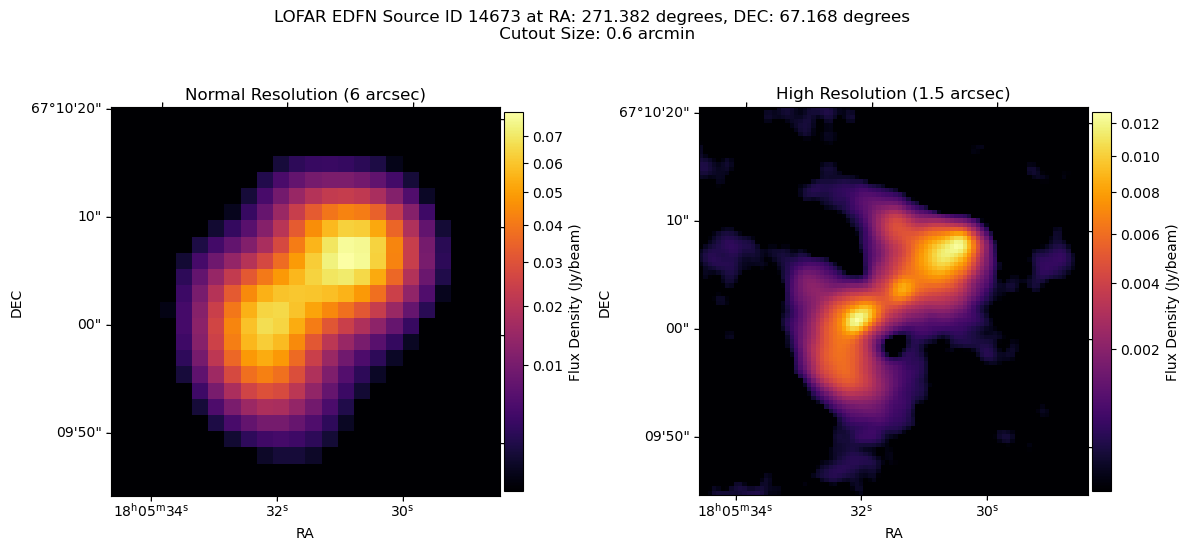

In [16]:
# Now make cutouts of both images around the source position and show them side by side
cutout_size_id14673 = 0.6 * u.arcmin
normal_res_cutout = create_cutout(ra.value, dec.value, cutout_size_id14673, normal_res_image_data, normal_res_image_wcs)
rms_noise_normal = np.sqrt(np.mean(sigma_clip(normal_res_cutout.data, sigma=3, maxiters=7)**2))
high_res_cutout = create_cutout(ra.value, dec.value, cutout_size_id14673, high_res_image_data, high_res_image_wcs)
rms_noise_high = np.sqrt(np.mean(sigma_clip(high_res_cutout.data, sigma=3, maxiters=7)**2))

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection=normal_res_cutout.wcs)
norm1 = ImageNormalize(vmin=rms_noise_normal, vmax=np.max(normal_res_cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
im1 = ax1.imshow(normal_res_cutout.data, origin='lower', cmap='inferno', norm=norm1)
ax1.set_title('Normal Resolution (6 arcsec)')
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
fig.colorbar(im1, ax=ax1, label='Flux Density (Jy/beam)', pad=0.01, fraction=0.046)

ax2 = fig.add_subplot(1, 2, 2, projection=high_res_cutout.wcs)
norm2 = ImageNormalize(vmin=rms_noise_high, vmax=np.max(high_res_cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
im2 = ax2.imshow(high_res_cutout.data, origin='lower', cmap='inferno', norm=norm2)
ax2.set_title('High Resolution (1.5 arcsec)')
ax2.set_xlabel('RA')
ax2.set_ylabel('DEC')
fig.colorbar(im2, ax=ax2, label='Flux Density (Jy/beam)', pad=0.01, fraction=0.046)

plt.suptitle(f"LOFAR EDFN Source ID {source_id} at RA: {ra[0]:.3f} degrees, DEC: {dec[0]:.3f} degrees \n Cutout Size: {cutout_size_id14673:.1f}")
plt.tight_layout()
plt.show()

### What exactly is the RMS?

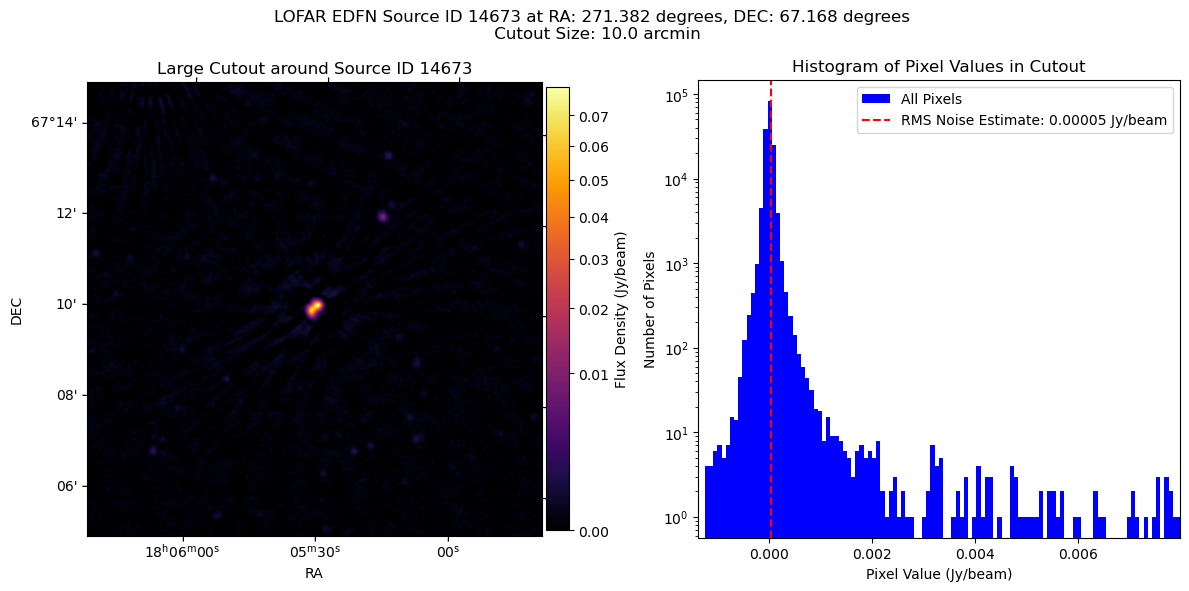

In [96]:
# We make a large cutout centred on the source we used above
cutout_size_large = 10.0 * u.arcmin
large_cutout = create_cutout(ra.value, dec.value, cutout_size_large, normal_res_image_data, normal_res_image_wcs)
clipped_data = sigma_clip(large_cutout.data, sigma=3, maxiters=7, cenfunc='mean')
rms_noise_large = np.sqrt(np.mean(clipped_data[0]**2))

# Now we first show the cutout in a panel on the left and on the right there will be a histogram of the pixel values. We also
# add a histogram of the clipped pixel values to show the effect of clipping on the noise estimate.
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection=large_cutout.wcs)
norm_large = ImageNormalize(vmin=0., vmax=np.max(large_cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.5))
im_large = ax1.imshow(large_cutout.data, origin='lower', cmap='inferno', norm=norm_large)
ax1.set_title('Large Cutout around Source ID 14673')
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
fig.colorbar(im_large, ax=ax1, label='Flux Density (Jy/beam)', pad=0.01, fraction=0.046)

ax2 = fig.add_subplot(1, 2, 2)
min, max = np.min(large_cutout.data), np.max(large_cutout.data)
bins = np.linspace(min, max, 1000)
ax2.hist(large_cutout.data.flatten(), bins=bins, color='blue', label='All Pixels')
ax2.axvline(rms_noise_large, color='red', linestyle='dashed', linewidth=1.5, label=f'RMS Noise Estimate: {rms_noise_large:.5f} Jy/beam')
ax2.set_xlabel('Pixel Value (Jy/beam)')
ax2.set_ylabel('Number of Pixels')
ax2.set_title('Histogram of Pixel Values in Cutout')
ax2.set_yscale('log')
ax2.set_xlim(1.1*min, max/10)
ax2.legend()
plt.suptitle(f"LOFAR EDFN Source ID {source_id} at RA: {ra[0]:.3f} degrees, DEC: {dec[0]:.3f} degrees \n Cutout Size: {cutout_size_large:.1f}")
plt.tight_layout()
plt.show()

### Find the 0.7 and 0.5 arcsecond images of ID 14673

In [13]:
# Open the combined source catalogues for the 0.7 and 0.5 arcsecond images
source_cat_07arcsec_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_EDFN/0.5-arcsec/0.5arcsec_merged_source_table.fits"
hdu_list = fits.open(source_cat_07arcsec_path)
#hdu_list.info()

coord_id14673 = SkyCoord(ra=ra.value*u.degree, dec=dec.value*u.degree)

# Go through each table in the HDU list and find the entry closest to coord_id14673
for i, hdu in enumerate(hdu_list[1:]):
    table = Table(hdu.data)
    coords_table = SkyCoord(ra=table['RA']*u.degree, dec=table['DEC']*u.degree)
    idx, sep2d, _ = match_coordinates_sky(coord_id14673, coords_table)
    print(f"HDU: {hdu.name}, HDU number: {i}, Closest Source ID: {table['Source_id'][idx][0]}, Separation: {sep2d.arcsec[0]:.3f} arcsec")
hdu_list.close()
print("\n")

# Now do the same for the 0.5 arcsecond catalogue
source_cat_05arcsec_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_EDFN/0.5-arcsec/0.5arcsec_merged_source_table.fits"
hdu_list_05 = fits.open(source_cat_05arcsec_path)
#hdu_list_05.info()

coord_id14673 = SkyCoord(ra=ra.value*u.degree, dec=dec.value*u.degree)

# Go through each table in the HDU list and find the entry closest to coord_id14673
for i, hdu in enumerate(hdu_list_05[1:]):
    table = Table(hdu.data)
    coords_table = SkyCoord(ra=table['RA']*u.degree, dec=table['DEC']*u.degree)
    idx, sep2d, _ = match_coordinates_sky(coord_id14673, coords_table)
    print(f"HDU: {hdu.name}, HDU number: {i}, Closest Source ID: {table['Source_id'][idx][0]}, Separation: {sep2d.arcsec[0]:.3f} arcsec")
hdu_list_05.close()

HDU: /data2/visserscott/Observational_data/LOFAR/LoTSS_deep_EDFN/0.5-arcs, HDU number: 0, Closest Source ID: 96, Separation: 3677.091 arcsec
HDU: /data2/visserscott/Observational_data/LOFAR/LoTSS_deep_EDFN/0.5-arcs, HDU number: 1, Closest Source ID: 190, Separation: 6855.884 arcsec
HDU: /data2/visserscott/Observational_data/LOFAR/LoTSS_deep_EDFN/0.5-arcs, HDU number: 2, Closest Source ID: 1, Separation: 4220.121 arcsec
HDU: /data2/visserscott/Observational_data/LOFAR/LoTSS_deep_EDFN/0.5-arcs, HDU number: 3, Closest Source ID: 52, Separation: 8480.638 arcsec
HDU: /data2/visserscott/Observational_data/LOFAR/LoTSS_deep_EDFN/0.5-arcs, HDU number: 4, Closest Source ID: 321, Separation: 4241.926 arcsec
HDU: /data2/visserscott/Observational_data/LOFAR/LoTSS_deep_EDFN/0.5-arcs, HDU number: 5, Closest Source ID: 8, Separation: 5153.900 arcsec
HDU: /data2/visserscott/Observational_data/LOFAR/LoTSS_deep_EDFN/0.5-arcs, HDU number: 6, Closest Source ID: 305, Separation: 2260.631 arcsec
HDU: /data2/

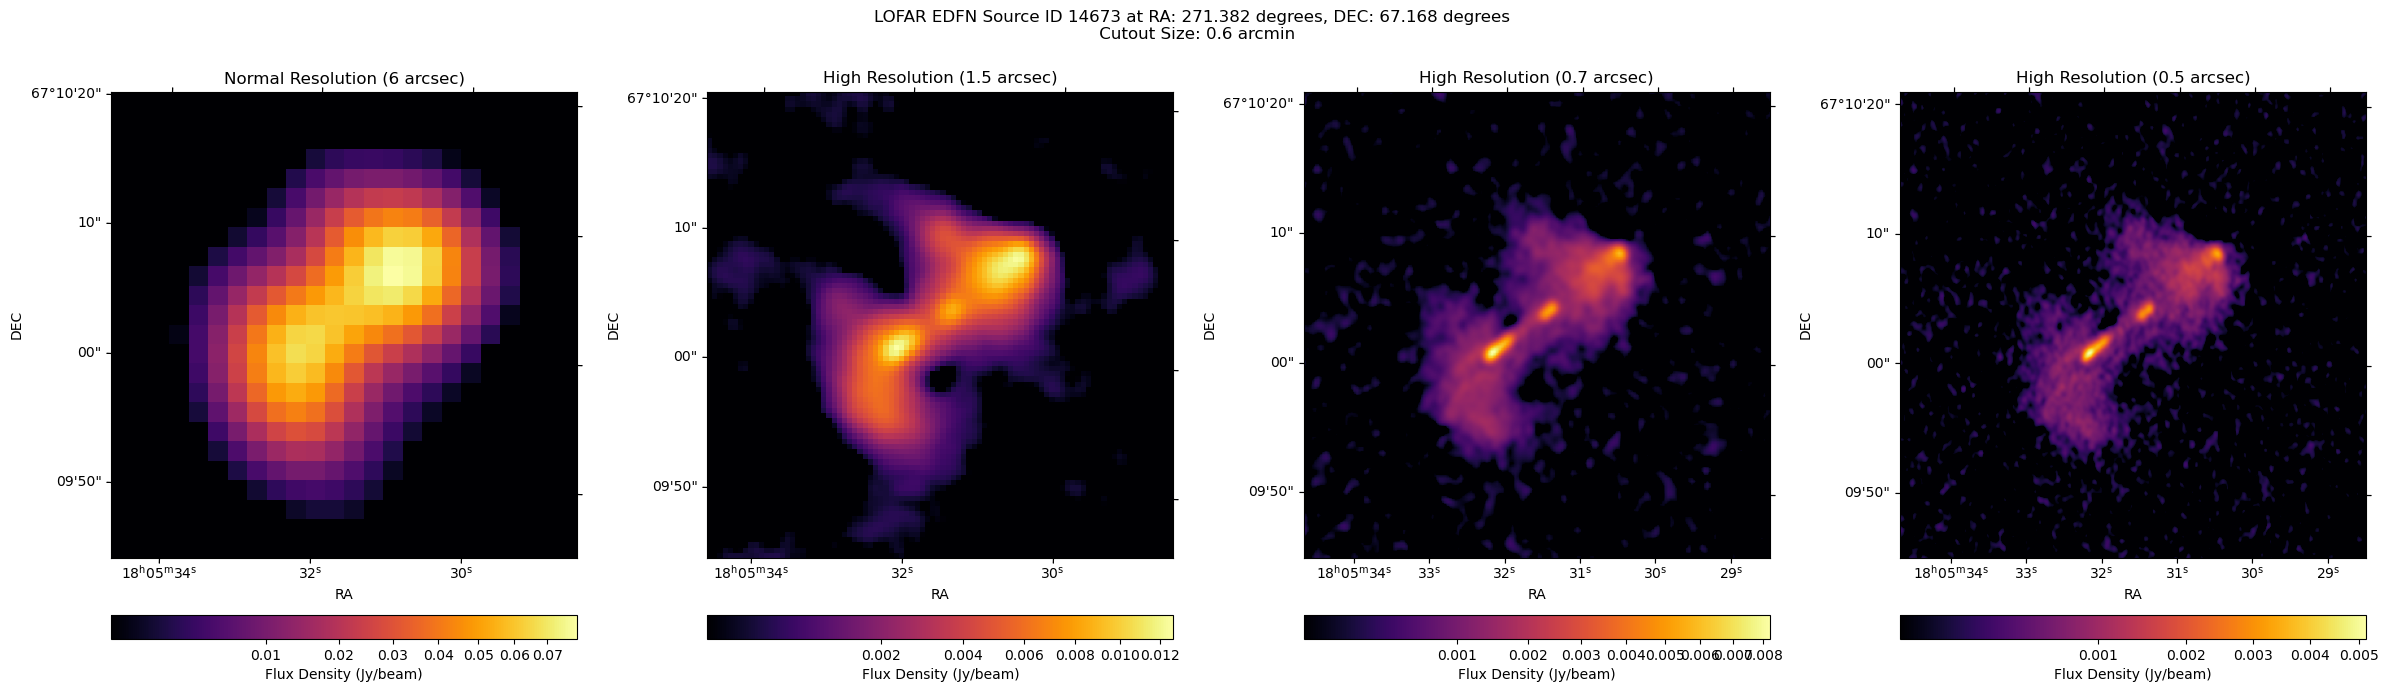

In [21]:
# Now we make cutouts of the 0.7 and 0.5 arcsecond images around the source position and show them side by side
cutout_size_id14673 = 0.6 * u.arcmin
highres_07arcsec_image_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_EDFN/0.7-arcsec/poly_13_int_corr.fits"
hdu_07 = fits.open(highres_07arcsec_image_path)
highres_07arcsec_image_data = hdu_07[0].data.squeeze().squeeze()
highres_07arcsec_image_header = hdu_07[0].header
highres_07arcsec_image_wcs = wcs.WCS(highres_07arcsec_image_header).celestial
highres_07arcsec_cutout = create_cutout(ra.value, dec.value, cutout_size_id14673, highres_07arcsec_image_data, highres_07arcsec_image_wcs)
rms_noise_07arcsec = np.sqrt(np.mean(sigma_clip(highres_07arcsec_cutout.data, sigma=3, maxiters=7)**2))

highres_05arcsec_image_path = "/data2/visserscott/Documents/Observational_Data/LOFAR/LoTSS_deep_EDFN/0.5-arcsec/poly_13_0.5asec_flux+astrometry_corr.fits"
hdu_05 = fits.open(highres_05arcsec_image_path)
highres_05arcsec_image_data = hdu_05[0].data.squeeze().squeeze()
highres_05arcsec_image_header = hdu_05[0].header
highres_05arcsec_image_wcs = wcs.WCS(highres_05arcsec_image_header).celestial
highres_05arcsec_cutout = create_cutout(ra.value, dec.value, cutout_size_id14673, highres_05arcsec_image_data, highres_05arcsec_image_wcs)
rms_noise_05arcsec = np.sqrt(np.mean(sigma_clip(highres_05arcsec_cutout.data, sigma=3, maxiters=7)**2))

# Make a 4-panel plot showing all four cutouts
fig = plt.figure(figsize=(24, 7))
ax1 = fig.add_subplot(1, 4, 1, projection=normal_res_cutout.wcs)
norm1 = ImageNormalize(vmin=rms_noise_normal, vmax=np.max(normal_res_cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
im1 = ax1.imshow(normal_res_cutout.data, origin='lower', cmap='inferno', norm=norm1)
ax1.set_title('Normal Resolution (6 arcsec)')
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
fig.colorbar(im1, ax=ax1, label='Flux Density (Jy/beam)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

ax2 = fig.add_subplot(1, 4, 2, projection=high_res_cutout.wcs)
norm2 = ImageNormalize(vmin=rms_noise_high, vmax=np.max(high_res_cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
im2 = ax2.imshow(high_res_cutout.data, origin='lower', cmap='inferno', norm=norm2)
ax2.set_title('High Resolution (1.5 arcsec)')
ax2.set_xlabel('RA')
ax2.set_ylabel('DEC')
fig.colorbar(im2, ax=ax2, label='Flux Density (Jy/beam)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

ax3 = fig.add_subplot(1, 4, 3, projection=highres_07arcsec_cutout.wcs)
norm3 = ImageNormalize(vmin=rms_noise_07arcsec, vmax=np.max(highres_07arcsec_cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
im3 = ax3.imshow(highres_07arcsec_cutout.data, origin='lower', cmap='inferno', norm=norm3)
ax3.set_title('High Resolution (0.7 arcsec)')
ax3.set_xlabel('RA')
ax3.set_ylabel('DEC')
fig.colorbar(im3, ax=ax3, label='Flux Density (Jy/beam)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

ax4 = fig.add_subplot(1, 4, 4, projection=highres_05arcsec_cutout.wcs)
norm4 = ImageNormalize(vmin=rms_noise_05arcsec, vmax=np.max(highres_05arcsec_cutout.data), stretch=SqrtStretch(), interval=PercentileInterval(99.9))
im4 = ax4.imshow(highres_05arcsec_cutout.data, origin='lower', cmap='inferno', norm=norm4)
ax4.set_title('High Resolution (0.5 arcsec)')
ax4.set_xlabel('RA')
ax4.set_ylabel('DEC')
fig.colorbar(im4, ax=ax4, label='Flux Density (Jy/beam)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

plt.suptitle(f"LOFAR EDFN Source ID {source_id} at RA: {ra[0]:.3f} degrees, DEC: {dec[0]:.3f} degrees \n Cutout Size: {cutout_size_id14673:.1f}")
plt.tight_layout()
plt.show()

## Week 3:
1. Making optical images with radio contour overlays (Option 1: Euclid in EDFN):
- Create Cosmos account and explore the example notebooks on ESA Datalabs
- Query a sample of galaxies in Euclid close to the high-resolution facet
- Download the Euclid image cutouts of 100 galaxies in bulk.
- Visualise the images (EXTRA: make colour images with VIS, J, H, Y bands)
- Make Euclid, LOFAR overlays for some of the sources
2. Making optical images with radio contour overlays (Option 2: ELAIS-N1):
- Go to https://lofar-surveys.org/deepfields_public_en1.html and download radio source catalogue, radio image, and optical images for the ELAIS-N1 deep field
- Select ~10 interesting radio sources and make optical images
- Make optical, LOFAR overlays for these sources
3. Plot SED of a crossmatched catalog

### Week 3, task 1
We show the example for the source ID 14673 in the EDFN with Euclid optical images. The Euclid cutouts have been saved in: /data2/visserscott/Documents/Student_Supervision/EDFN_ID14673_Euclid_cutouts <br>
We start with contours overlaid on the VIS cutout with the Greys colormap. We later add an rgb image using three Euclid filters together with the LOFAR contours.

In [68]:
from make_euclid_cutouts import make_euclid_cutout_with_coord
cutout_paths = make_euclid_cutout_with_coord(coord=coord_id14673[0], instrument="VIS + NISP", cutout_radius=0.3*u.arcmin, save_folder_path="/data2/visserscott/Documents/Student_Supervision/EDFN_ID14673_Euclid_cutouts/", nisp_filters=['NIR_H', 'NIR_J', 'NIR_Y'])
print(cutout_paths)

INFO: Login to Euclid TAP server: eas.esac.esa.int:443/tap-server/tap/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid data service: eas.esac.esa.int:443/sas-dd/tap-server/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid cutout service: eas.esac.esa.int:443/sas-cutout/tap-server/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Found 1 query results
INFO: Login to Euclid TAP server: eas.esac.esa.int:443/tap-server/tap/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid data service: eas.esac.esa.int:443/sas-dd/tap-server/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Login to Euclid cutout service: eas.esac.esa.int:443/sas-cutout/tap-server/ [astroquery.esa.euclid.core]
INFO: OK [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Found 3 query results
Fi

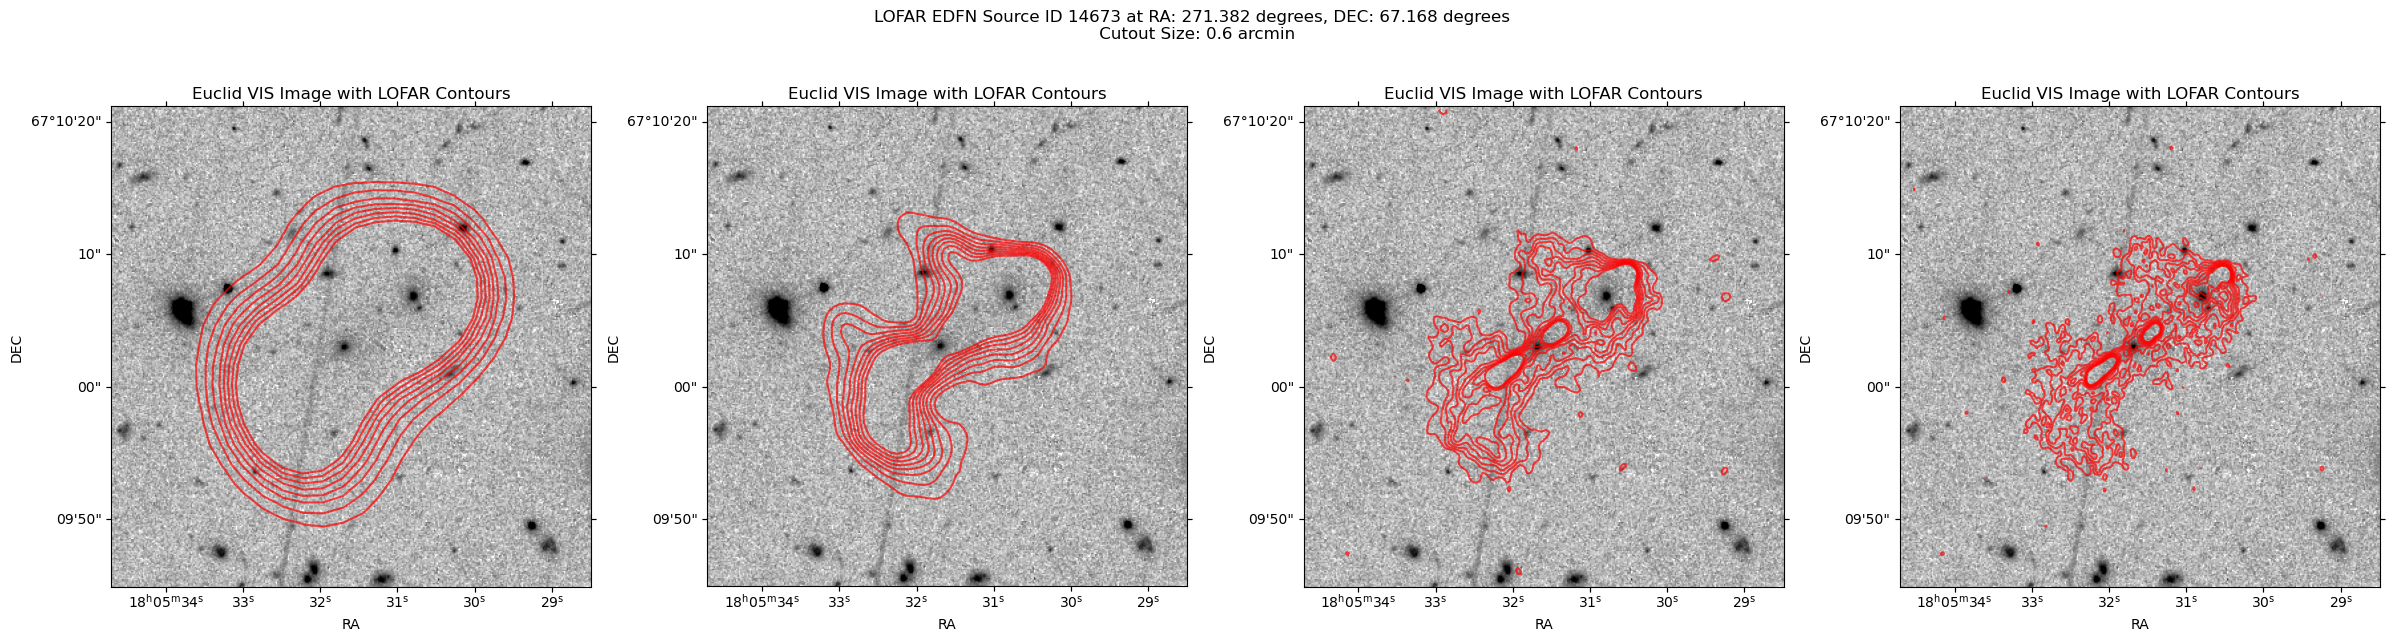

In [69]:
# First make the overlays with VIS image in Grey scale
vis_cutout_path = cutout_paths[0][0]
vis_data = fits.getdata(vis_cutout_path, ext=0)
vis_wcs = wcs.WCS(fits.getheader(vis_cutout_path, ext=0)).celestial
vis_norm = ImageNormalize(vis_data, interval=PercentileInterval(99.5), stretch=AsinhStretch())

# Now make the plot with the VIS image and the radio contours for every resolution overlaid
fig = plt.figure(figsize=(24, 7))
ax1 = fig.add_subplot(1, 4, 1, projection=vis_wcs)
ax1.imshow(vis_data, origin='lower', cmap='Greys', norm=vis_norm)
ax1.set_title('Euclid VIS Image with LOFAR Contours')
ax1.set_xlabel('RA')
ax1.set_ylabel('DEC')
levels = np.arange(3, 18, 2) * rms_noise_normal
ax1.contour(normal_res_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax1.get_transform(normal_res_cutout.wcs))
#fig.colorbar(ax1.images[0], ax=ax1, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

ax2 = fig.add_subplot(1, 4, 2, projection=vis_wcs)
ax2.imshow(vis_data, origin='lower', cmap='Greys', norm=vis_norm)
ax2.set_title('Euclid VIS Image with LOFAR Contours')
ax2.set_xlabel('RA')
ax2.set_ylabel('DEC')
levels = np.arange(3, 18, 2) * rms_noise_high
ax2.contour(high_res_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax2.get_transform(high_res_cutout.wcs))
#fig.colorbar(ax2.images[0], ax=ax2, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

ax3 = fig.add_subplot(1, 4, 3, projection=vis_wcs)
ax3.imshow(vis_data, origin='lower', cmap='Greys', norm=vis_norm)
ax3.set_title('Euclid VIS Image with LOFAR Contours')
ax3.set_xlabel('RA')
ax3.set_ylabel('DEC')
levels = np.arange(3, 18, 2) * rms_noise_07arcsec
ax3.contour(highres_07arcsec_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax3.get_transform(highres_07arcsec_cutout.wcs))
#fig.colorbar(ax3.images[0], ax=ax3, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

ax4 = fig.add_subplot(1, 4, 4, projection=vis_wcs)
ax4.imshow(vis_data, origin='lower', cmap='Greys', norm=vis_norm)
ax4.set_title('Euclid VIS Image with LOFAR Contours')
ax4.set_xlabel('RA')
ax4.set_ylabel('DEC')
levels = np.arange(3, 18, 2) * rms_noise_05arcsec
ax4.contour(highres_05arcsec_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax4.get_transform(highres_05arcsec_cutout.wcs))
#fig.colorbar(ax4.images[0], ax=ax4, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')

plt.suptitle(f"LOFAR EDFN Source ID {source_id} at RA: {ra[0]:.3f} degrees, DEC: {dec[0]:.3f} degrees \n Cutout Size: {cutout_size_id14673:.1f}")
plt.tight_layout()
plt.show()

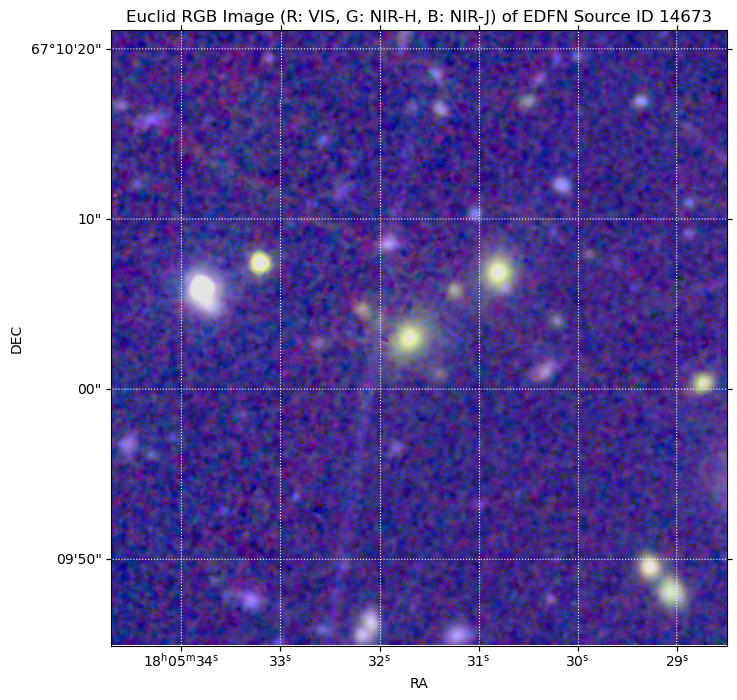

In [70]:
# The last thing to do is to make RGB images using VIS, NIR-H and NIR-J filters from Euclid
nir_h_cutout_path = cutout_paths[1][0]
nir_h_data = fits.getdata(nir_h_cutout_path, ext=0)
nir_h_wcs = wcs.WCS(fits.getheader(nir_h_cutout_path, ext=0)).celestial

nir_j_cutout_path = cutout_paths[3][0]
nir_j_data = fits.getdata(nir_j_cutout_path, ext=0)
nir_j_wcs = wcs.WCS(fits.getheader(nir_j_cutout_path, ext=0)).celestial

from astropy.visualization import make_lupton_rgb
norm = AsinhStretch() + PercentileInterval(99.5)
rgb = make_lupton_rgb(norm(nir_h_data), norm(nir_j_data), norm(vis_data), Q=2, stretch=0.7)

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, projection=vis_wcs)
ax.imshow(rgb, origin='lower')
ax.set_title(f'Euclid RGB Image (R: VIS, G: NIR-H, B: NIR-J) of EDFN Source ID {source_id}')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.grid(color='white', ls='dotted')
plt.show()

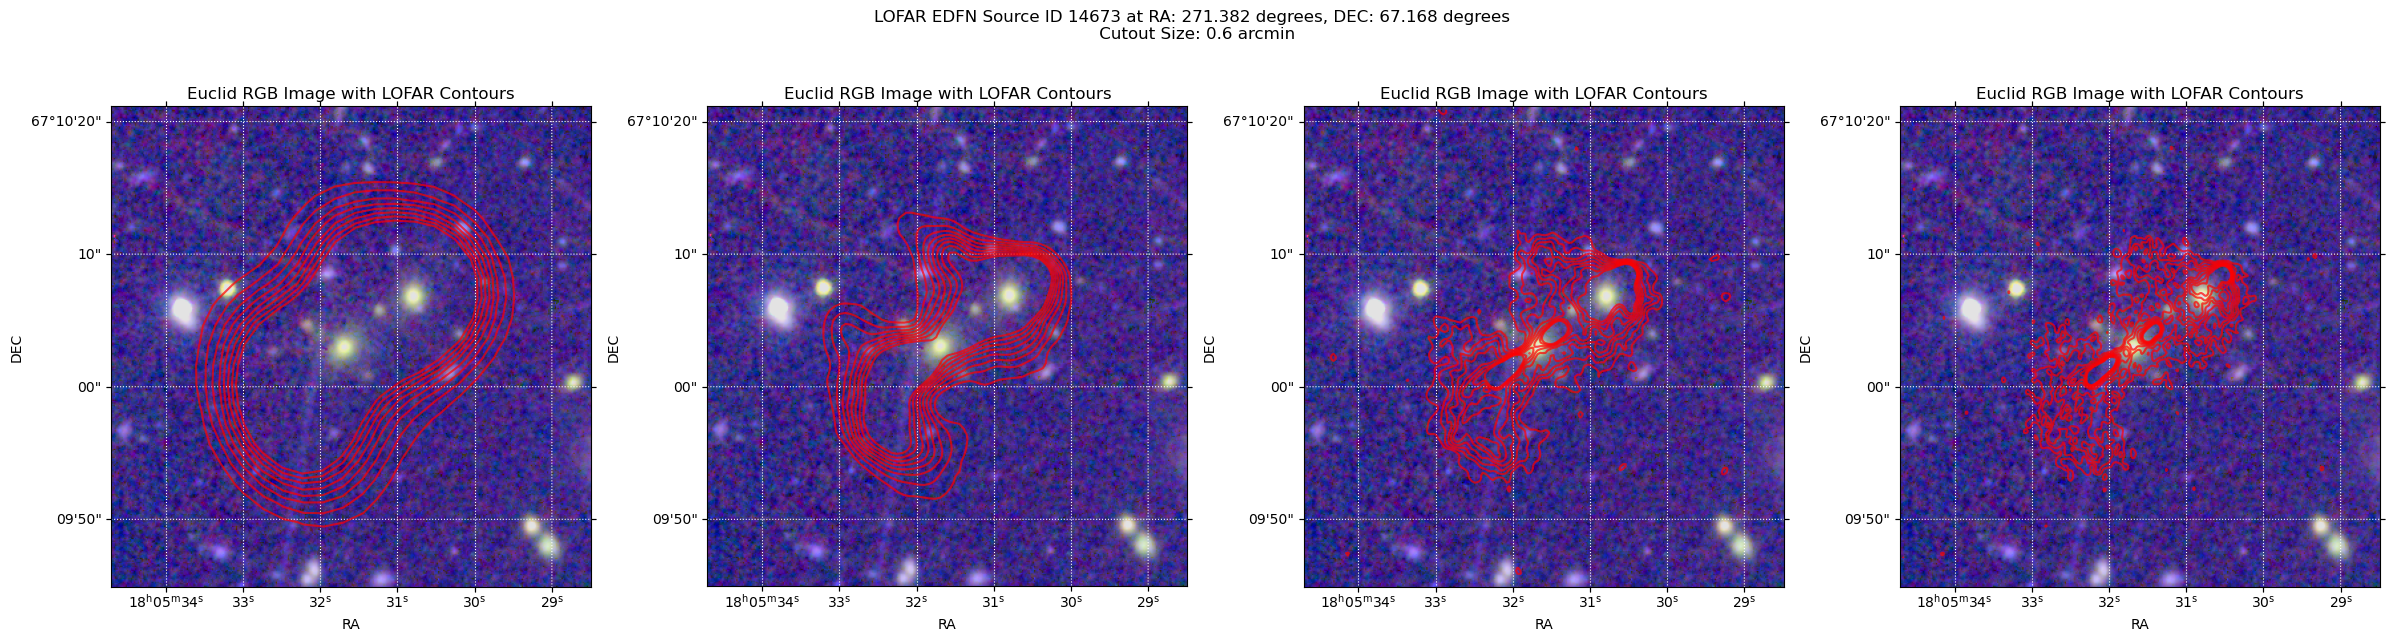

In [71]:
# Lastly, use the rgb image for Euclid and plot the radio contours on top of it for every resolution
fig = plt.figure(figsize=(24, 7))
ax1 = fig.add_subplot(1, 4, 1, projection=vis_wcs)
ax1.imshow(rgb, origin='lower')
ax1.set_title('Euclid RGB Image with LOFAR Contours')
ax1.set_xlabel('RA')    
levels = np.arange(3, 18, 2) * rms_noise_normal
ax1.contour(normal_res_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax1.get_transform(normal_res_cutout.wcs))
#fig.colorbar(ax1.images[0], ax=ax1, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')
ax1.set_ylabel('DEC')
ax1.grid(color='white', ls='dotted')

ax2 = fig.add_subplot(1, 4, 2, projection=vis_wcs)
ax2.imshow(rgb, origin='lower')
ax2.set_title('Euclid RGB Image with LOFAR Contours')
ax2.set_xlabel('RA')
levels = np.arange(3, 18, 2) * rms_noise_high
ax2.contour(high_res_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax2.get_transform(high_res_cutout.wcs))
#fig.colorbar(ax2.images[0], ax=ax2, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')
ax2.set_ylabel('DEC')
ax2.grid(color='white', ls='dotted')

ax3 = fig.add_subplot(1, 4, 3, projection=vis_wcs)
ax3.imshow(rgb, origin='lower')
ax3.set_title('Euclid RGB Image with LOFAR Contours')
ax3.set_xlabel('RA')
levels = np.arange(3, 18, 2) * rms_noise_07arcsec
ax3.contour(highres_07arcsec_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax3.get_transform(highres_07arcsec_cutout.wcs))
#fig.colorbar(ax3.images[0], ax=ax3, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')
ax3.set_ylabel('DEC')
ax3.grid(color='white', ls='dotted')

ax4 = fig.add_subplot(1, 4, 4, projection=vis_wcs)
ax4.imshow(rgb, origin='lower')
ax4.set_title('Euclid RGB Image with LOFAR Contours')
ax4.set_xlabel('RA')
levels = np.arange(3, 18, 2) * rms_noise_05arcsec
ax4.contour(highres_05arcsec_cutout.data, levels=levels, colors='red', alpha=0.7, transform=ax4.get_transform(highres_05arcsec_cutout.wcs))
#fig.colorbar(ax4.images[0], ax=ax4, label='Flux Density (arbitrary units)', pad=0.1, fraction=0.046, location='bottom', orientation='horizontal')
ax4.set_ylabel('DEC')
ax4.grid(color='white', ls='dotted')

plt.suptitle(f"LOFAR EDFN Source ID {source_id} at RA: {ra[0]:.3f} degrees, DEC: {dec[0]:.3f} degrees \n Cutout Size: {cutout_size_id14673:.1f}")
plt.tight_layout()
plt.show()